In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator, math, statistics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [3]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [4]:
countrySet = [x for x in np.unique(dataset[:,0], return_counts=True)]

In [6]:
unique, counts = np.unique(dataset[:,0], return_counts=True)
diccionario = dict(zip(unique, counts))

In [7]:
#Creación de variables usadas para el marco de datos normalizedDataset
robustCount = MinMaxScaler().fit_transform(countrySet[1].reshape(-1,1)).flat[:]
robustCountNormalized = (((robustCount - min(robustCount).reshape(-1,1))).flat[:])

mean = [statistics.geometric_mean(df[df["Nationality"]==pais]["Overall"])for pais in countrySet[0]]
robustMean = (MinMaxScaler().fit_transform(np.array(mean).reshape(-1,1))).flat[:]
robustMeanNormalized = (robustMean - min(robustMean).reshape(-1,1)).flat[:]

In [8]:
normalizedDataset = pd.DataFrame(data={'Nationality':countrySet[0], 'Count': countrySet[1],
                         "Mean": mean, 'RobustCount': robustCount, 'RobustMean': robustMean,
                      'RobustCountNormalized': robustCountNormalized,'RobustMeanNormalized': robustMeanNormalized
                                      })

In [9]:
normalizedDataset = normalizedDataset.assign(GeometricMean=[statistics.geometric_mean([x[0]+.0000001,x[1]+.0000001])
                for x in zip(normalizedDataset['RobustCountNormalized'], normalizedDataset['RobustMeanNormalized'])])

In [10]:
normalizedDataset.sort_values('GeometricMean',ascending=False).head(n=60)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,GeometricMean
139,Spain,1072,69.399849,0.644792,0.638088,0.644792,0.638088,0.641432
20,Brazil,827,71.032826,0.497291,0.715849,0.497291,0.715849,0.596645
46,England,1662,63.067219,1.000000,0.336534,1.000000,0.336534,0.580116
59,Germany,1198,65.758510,0.720650,0.464691,0.720650,0.464691,0.578688
6,Argentina,937,68.294150,0.563516,0.585436,0.563516,0.585436,0.574371
55,France,914,67.438628,0.549669,0.544697,0.549669,0.544697,0.547177
78,Italy,702,67.842462,0.422035,0.563927,0.422035,0.563927,0.487849
31,Colombia,618,65.263305,0.371463,0.441110,0.371463,0.441110,0.404791
108,Netherlands,453,67.383009,0.272125,0.542048,0.272125,0.542048,0.384064
123,Portugal,322,71.137432,0.193257,0.720830,0.193257,0.720830,0.373237


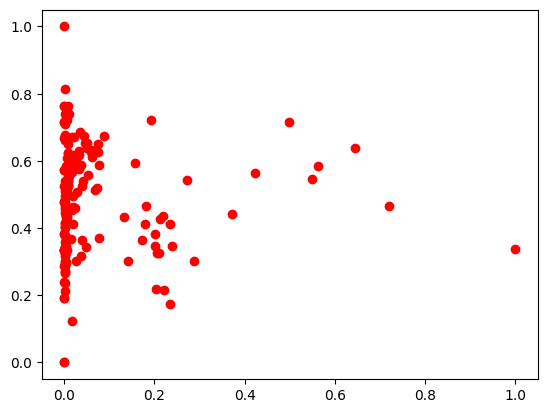

In [11]:
plt.scatter(normalizedDataset["RobustCountNormalized"].values, normalizedDataset["RobustMeanNormalized"].values, color='r')
plt.show()